<a href="https://colab.research.google.com/github/PedroHSS01/APQual-Instr-ML/blob/main/EstudantesTurquia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('/content/TurkiyeStudentEvaluation.csv')
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Avaliação
## Se conseguirmos atingir 95% de precisão em prever a preparação do instrutor  baseado no feedback  dos alunos, damos continuidade no projeto.

Sobre este arquivo

## instr - Identificador do Instrutor com valores de {1, 2, 3}.

## classe - Identificador do código do curso, com valores que variam de 1 a 13.

## nb.repeat - Número de repetições do curso

## Attendance - Nível de frequência  (variando de 0 a 4) que representa o nível de frequência às aulas

## Difficulty - Dificuldade Percebida do Curso , classificada em uma escala de 5 pontos.

Q1 - Informações do curso fornecidas no início

Q2 - Clareza dos objetivos e metas do curso

Q3 - Justificativa do Valor de Crédito

Q4 - Adesão ao Programa Anunciado

Q5 - Satisfação com as atividades da aula

Q6 - Qualidade e atualidade dos materiais do curso

Q7 - Inclusão de Estudos Práticos

Q8 - Eficácia das Avaliações

Q9 - Prazer e Engajamento

Q10 - Cumprimento das Expectativas Iniciais

Q11 - Relevância para o Desenvolvimento Profissional

Q12 - Ampliando a Perspectiva

Q13 - Conhecimento do instrutor sobre o assunto

Q14 - Preparação do instrutor

Q15 - Adesão ao Plano de Aula

Q16 - Comprometimento e Clareza do Instrutor

Q17 - Pontualidade

Q18 - Habilidades de entrega e comunicação

Q19 - Uso eficiente do tempo de aula

Q20 - Clareza na explicação do curso

Q21 - Abordagem Positiva

Q22 - Respeito às opiniões dos alunos

Q23 - Incentivo à Participação

Q24 - Apoio por meio de tarefas e orientações

Q25 - Capacidade de resposta às perguntas dos alunos

Q26 - Eficácia do Sistema de Avaliação

Q27 - Feedback e revisão do exame

Q28 - Tratamento Justo e Objetivo

## Os valores de Q's são de 1 à 5  (1 indicando forte discordância e 5 indicando forte concordância)

#  EDA

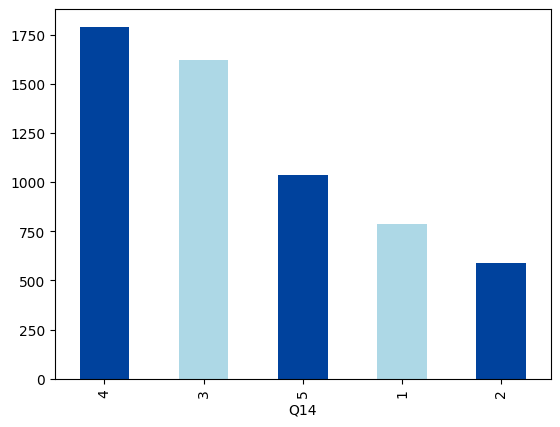

In [3]:
df['Q14'].value_counts().plot(kind='bar', color=['#00429d', 'lightblue']);

In [4]:
print(df[['instr']].nunique())

instr    3
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [6]:
pd.crosstab(df['Q14'], df['Q16'])

Q16,1,2,3,4,5
Q14,,,,,
1,766,12,5,2,2
2,52,446,68,21,3
3,61,142,1324,76,17
4,30,83,245,1366,65
5,8,6,39,91,890


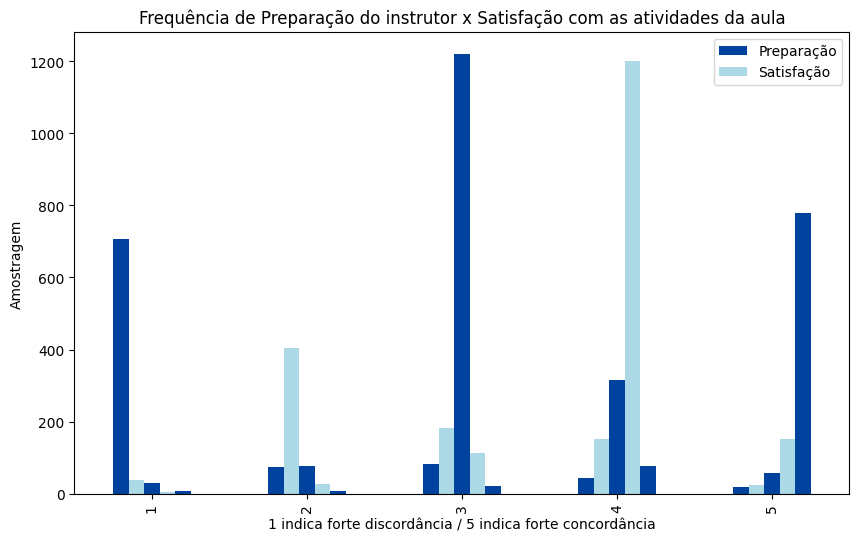

In [7]:
pd.crosstab(df['Q14'], df['Q5']).plot(kind='bar',
                                       figsize=(10,6),
                                       color=['#00429d', 'lightblue'])
plt.title('Frequência de Preparação do instrutor x Satisfação com as atividades da aula')
plt.xlabel('1 indica forte discordância / 5 indica forte concordância')
plt.ylabel('Amostragem')
plt.legend(['Preparação', 'Satisfação']);

In [8]:
print(df['nb.repeat'].nunique())

3


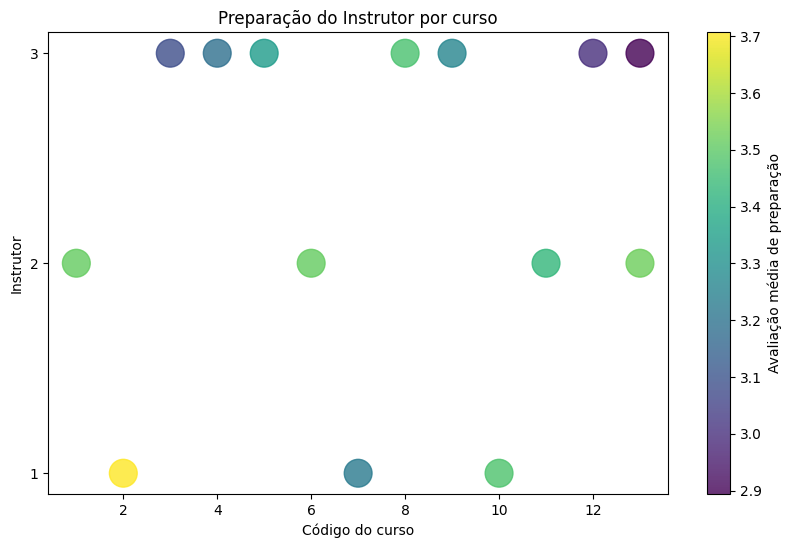

In [9]:
plt.figure(figsize=(10,6))
grpd =df.groupby(['instr', 'class'])['Q14'].mean().reset_index()

scatter =plt.scatter( x =grpd['class'], y =grpd['instr'], c=grpd['Q14'], s=400, alpha=0.8)
plt.colorbar(scatter, label='Avaliação média de preparação')
plt.title('Preparação do Instrutor por curso')
plt.xlabel('Código do curso')
plt.ylabel('Instrutor')
plt.yticks([1, 2, 3])
plt.show()

# Análise do Gráfico de Dispersão

O instrutor 3 tem uma avaliação média 3.1 ~ 3.3 com três círculos roxos, 2 círculos azuis escuto com média de 2.9 ~ 3.0 (baixa), dois círculos verde claro com avaliação média 3.6 ~ 3.7 (alta)

O instrutor 1, tem círculo amarelo com avaliação 3.7 (a mais alta do gráfico)

Já o instrutor 2, possui quatro círculos verdes com avaliação consistentemente alta (3.5 ~ 3.7)

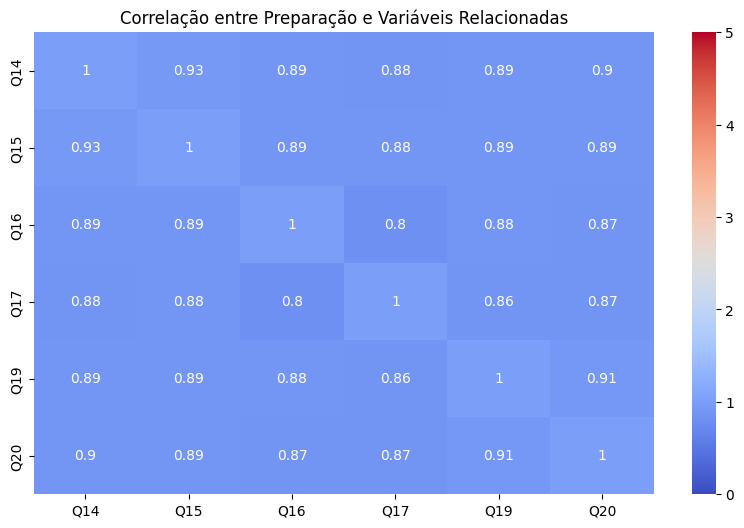

In [10]:
outras_vari =['Q14', 'Q15', 'Q16', 'Q17', 'Q19', 'Q20']
plt.figure(figsize=(10,6))
sns.heatmap(df[outras_vari].corr(), annot=True, cmap='coolwarm', vmin=0, vmax=5)
plt.title('Correlação entre Preparação e Variáveis Relacionadas')
plt.show()

# Os Q's analisados a cima são ->

Q14 - Preparação do instrutor

Q15 - Adesão ao Plano de Aula

Q16 - Comprometimento e Clareza do Instrutor

Q17 - Pontualidade

Q19 - Uso eficiente do tempo de aula

Q20 - Clareza na explicação do curso

## Q14 mostra alta correlação com Q15 (0.93), Q20 (0.90) e Q19 (0.89), indicando forte relação entre preparação e execução didática.
## É possível que os alunos associem um instrutor bem preparado ao uso eficiente do tempo em aula e à clareza nas explicações.

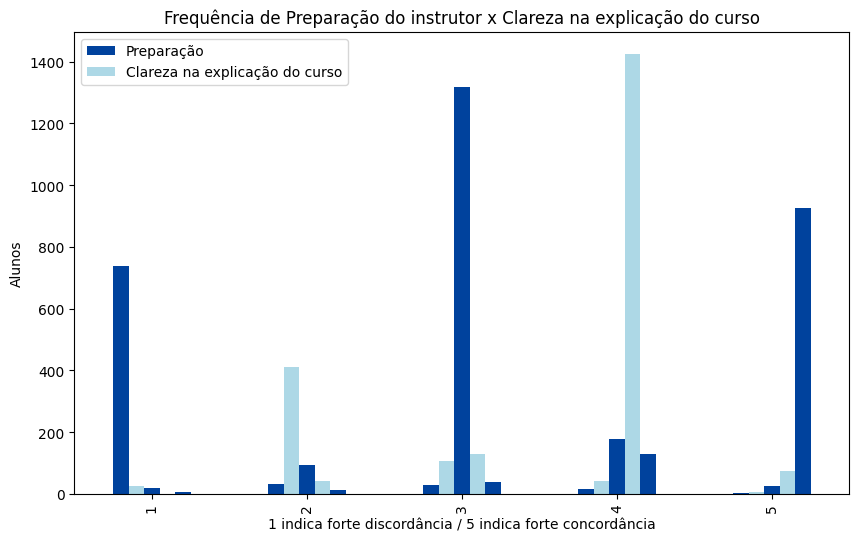

In [11]:
pd.crosstab(df['Q14'], df['Q20']).plot(kind='bar',
                                       figsize=(10,6),
                                       color=['#00429d', 'lightblue'])
plt.title('Frequência de Preparação do instrutor x Clareza na explicação do curso')
plt.xlabel('1 indica forte discordância / 5 indica forte concordância')
plt.ylabel('Alunos')
plt.legend(['Preparação', 'Clareza na explicação do curso']);

# Preparação para o modelo

In [12]:
X = df.drop('Q14', axis=1)
y = df['Q14']
X.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [13]:
y.head()

,Q14
0,3
1,3
2,5
3,3
4,1


# Treino e Teste

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
len(X_train), len(y_train)


(4656, 4656)

In [17]:
len(X_test), len(y_test)

(1164, 1164)

# O scikit-learn oferece um fluxograma em sua documentação para ajudar na seleção do algoritmo de machine learning mais apropriado. Veja a baixo.

ml_map.svg

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
models = {'KNN': KNeighborsClassifier(),
          'Logistic Regression': LogisticRegression(),
          'Random Forest': RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
  model_score = {}
  for name, model in models.items():
    model.fit(X_train, y_train)

    model_score[name] = model.score(X_test, y_test)
  return model_score

In [20]:
fit_and_score(models=models,
              X_train=X_train,
              X_test=X_test,
              y_train=y_train,
              y_test=y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.8470790378006873,
 'Logistic Regression': 0.7663230240549829,
 'Random Forest': 0.9012027491408935}

# Validação cruzada

In [21]:
train_score = []
test_score = []

neighbors =range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors= i)

  knn.fit(X_train, y_train)

  train_score.append(knn.score(X_train, y_train))
  test_score.append(knn.score(X_test, y_test))

Desempenho máximo de KNN nos dados de teste: 85.82%


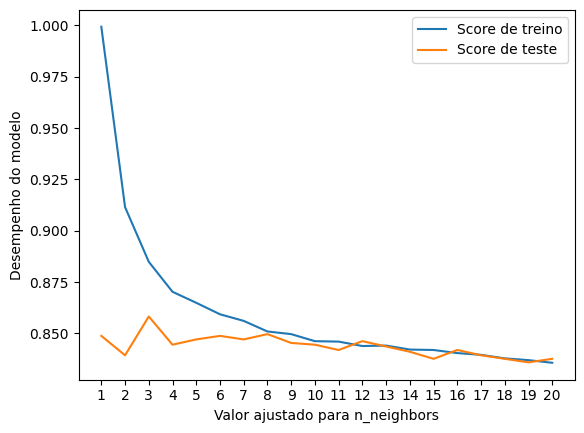

In [22]:
plt.plot(neighbors, train_score, label='Score de treino')
plt.plot(neighbors, test_score, label='Score de teste')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Valor ajustado para n_neighbors')
plt.ylabel('Desempenho do modelo')
plt.legend()
print(f'Desempenho máximo de KNN nos dados de teste: {max(test_score)*100:.2f}%');

## Mesmo após ajustes nos parâmetros, o desempenho do KNN não se aproximou dos resultados do Random Forest, mas também não caiu para níveis próximos aos da Logistic Regression.

# RandomizedSearchCV

## O RandomizedSearchCV é uma ferramenta que permite a busca automatizada dos melhores hiperparâmetros para um modelo de machine learning. Ao invés de realizar uma busca exaustiva por todas as combinações possíveis, o RandomizedSearchCV utiliza a técnica de busca aleatória para encontrar uma amostra representativa dessas combinações. Abaixo uma ilustração do RandomizedSearchCV, talvez para um melhor entendimento, busque trocar "Precisão" por pontuação e "Combinação" por Hiperparâmetros testados.

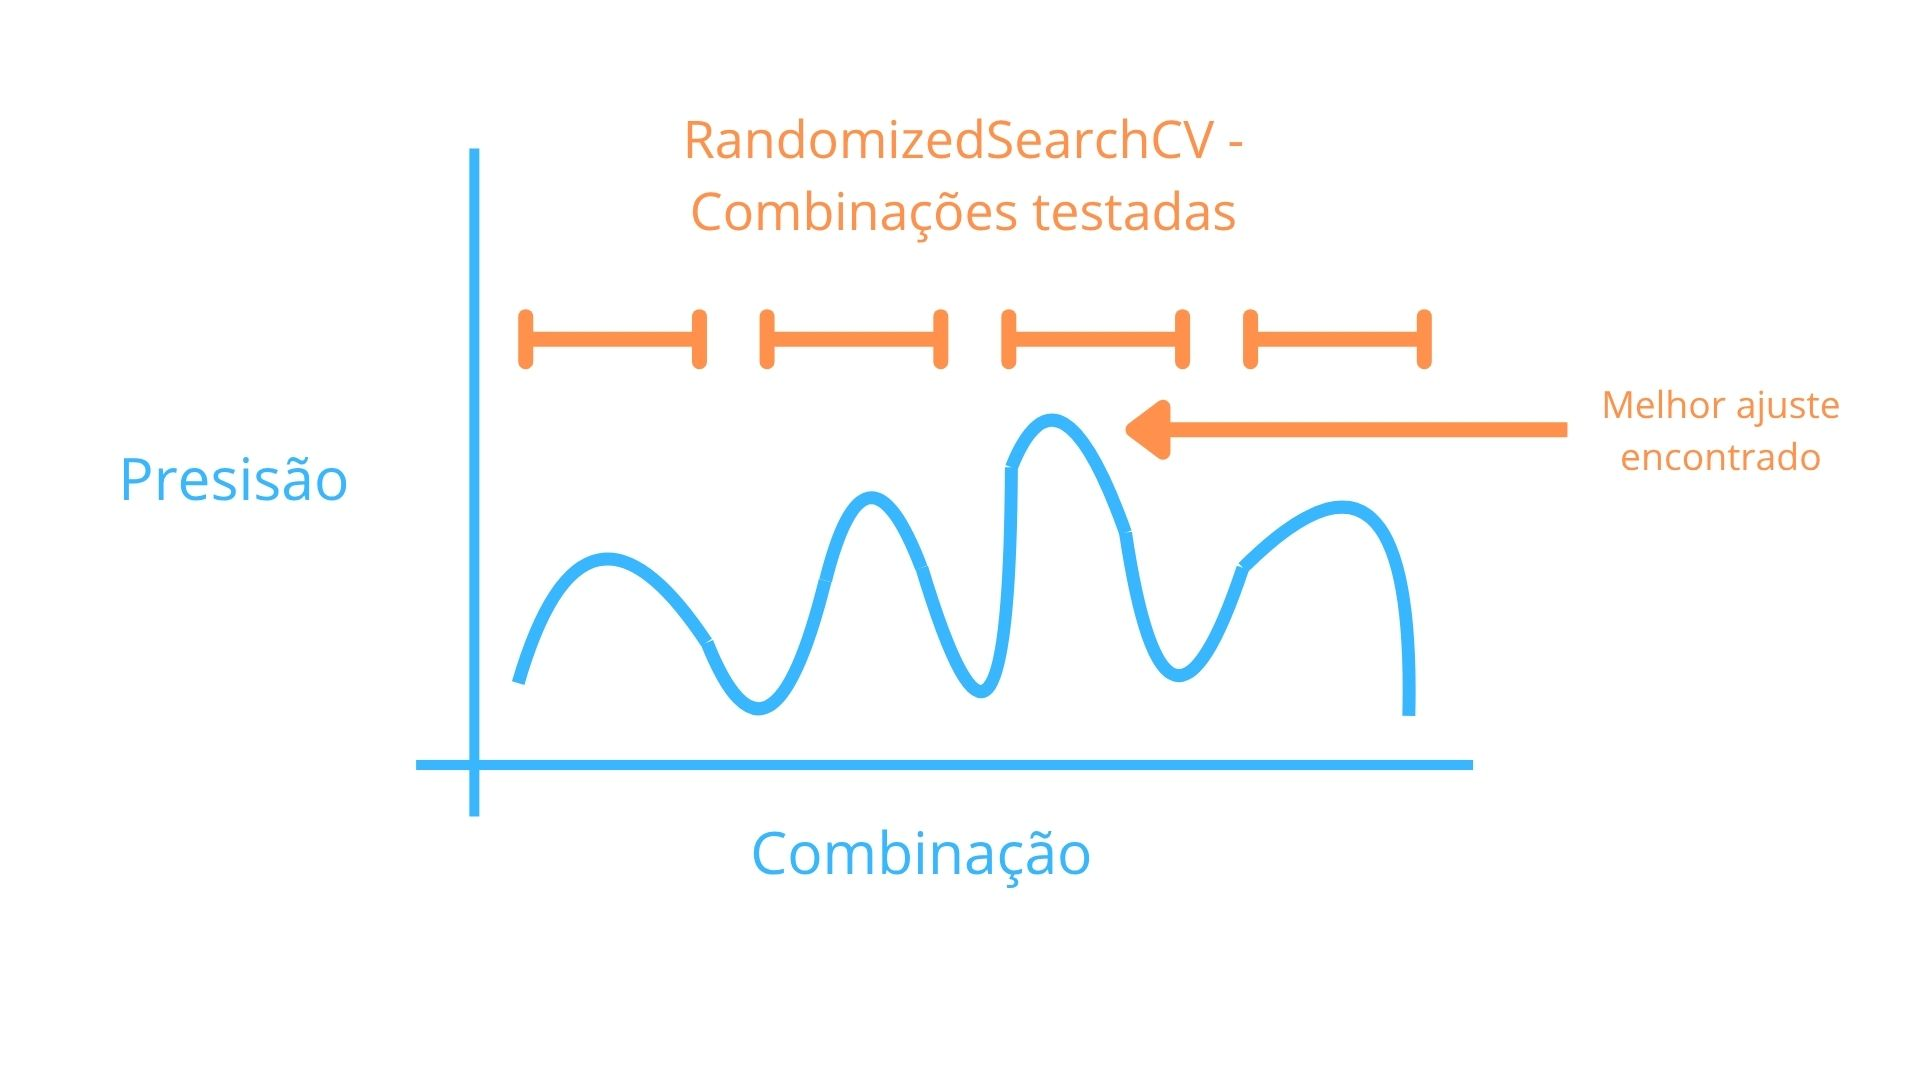

In [23]:
logreg_grid ={'C': np.logspace(-4, 4,20),
              'solver': ['liblinear']}

rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
rscv_log_reg =RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=logreg_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)
rscv_log_reg.fit(X_train, y_train)
rscv_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': np.float64(78.47599703514607)}

## Parece que, dentre as combinações testadas, o algoritmo identificou que a melhor configuração para a Regressão Logística foi com C ≈ 29.76 e solver='liblinear', apresentando o melhor desempenho médio na validação cruzada de 5 folds.

In [26]:
rscv_log_reg.score(X_test, y_test)

0.7860824742268041

In [27]:
rscv_rf =RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

rscv_rf.fit(X_train, y_train)
rscv_rf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': np.int64(910),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': np.int64(5),
 'max_depth': 10}

## Aparentemente, foram encontradas 110 árvores de decisão individuais, onde um nó só será dividido se contiver pelo menos 18 amostras e cada folha da árvore pode ter no mínimo 1 amostra. (As árvores podem crescer até a profundidade máxima possível "sem limite pré-definido").

In [28]:
rscv_rf.score(X_test, y_test)

0.8969072164948454

# Para desencargo de consciência, será testado o modelo GridSearchCV para observar seus resultados.

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
gs_log_reg =GridSearchCV(LogisticRegression(),
                         param_grid=logreg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(X_train, y_train);
gs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': np.float64(78.47599703514607), 'solver': 'liblinear'}

In [31]:
gs_log_reg.score(X_test, y_test)

0.7860824742268041

## Os resultados foram os mesmos

# Avaliação do modelo

In [32]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix

In [33]:
y_preds =rscv_rf.predict(X_test)
y_preds

array([5, 4, 3, ..., 1, 3, 4])

In [34]:
np.array(y_test)

array([5, 4, 4, ..., 1, 3, 4])

In [35]:
cm =confusion_matrix(y_test, y_preds)
print(cm)

[[145   4   0   0   0]
 [  3  96  25   4   0]
 [  0  10 292  17   0]
 [  0   0  23 324   8]
 [  0   0   2  24 187]]


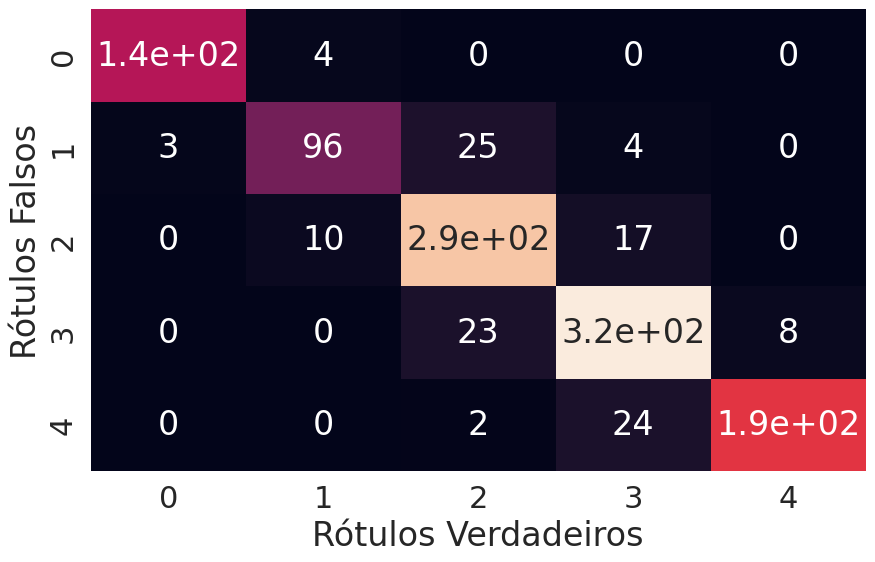

In [36]:
sns.set(font_scale=2)
fig, ax =plt.subplots(figsize=(10, 6))
ax =sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                cbar=False)
plt.xlabel('Rótulos Verdadeiros')
plt.ylabel('Rótulos Falsos');

## A matriz mostra que o modelo tem bom desempenho geral, mas precisa de ajustes para algumas classes específicas.

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

In [59]:
# Obtêm o melhor estimador de RandomizedSearchCV
best_log_reg_model = rscv_log_reg.best_estimator_
best_rf_model = rscv_rf.best_estimator_

# Obtêm probabilidades previstas para a classe positiva
y_probs_log_reg = best_log_reg_model.predict_proba(X_test)
y_probs_rf = best_rf_model.predict_proba(X_test)

frp1, tpr1, thresh1 = roc_curve(y_test, y_probs_log_reg[:, 1], pos_label=1)
frp2, tpr2, thresh2 = roc_curve(y_test, y_probs_rf[:, 1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

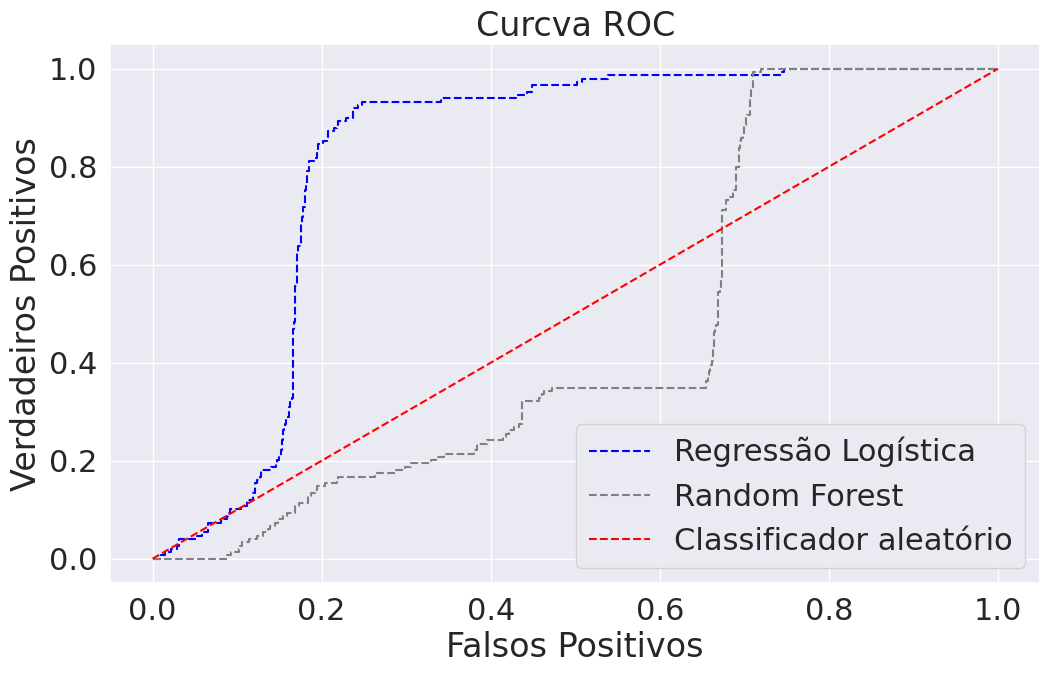

In [66]:
plt.figure(figsize=(12, 7))
plt.plot(frp1, tpr1, linestyle ='--', color ='blue', label='Regressão Logística')
plt.plot(frp2, tpr2, linestyle ='--', color ='gray', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle ='--', color ='red', label='Classificador aleatório')

plt.title('Curcva ROC')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.show()

In [63]:
print(f"AUC Score Random Forest: {roc_auc_score(y_test, y_probs_rf, multi_class='ovr') * 100:.2f}%")
print(f"AUC Score Regressão Logística: {roc_auc_score(y_test, y_probs_log_reg, multi_class='ovr') * 100:.2f}%")

AUC Score Random Forest: 98.97%
AUC Score Regressão Logística: 93.52%


# Regressão Logística ->

O modelo consegue identificar uma boa proporção de verdadeiros positivos com uma taxa relativamente baixa de falsos positivos. No entanto, ela se "achatou" um pouco antes de atingir 1.0 de verdadeiros positivos, o que pode indicar que para capturar mais verdadeiros positivos, o modelo precisa aceitar um número maior de falsos positivos.

# Random Forest ->

A curva desempenho alta taxa de verdadeiros positivos (TPR) enquanto mantém uma baixa taxa de falsos positivos (FPR) em comparação com a Regressão Logística, especialmente nas regiões de FPR mais baixas.

# Ambos os modelos apresentam bom desempenho na tarefa de classificação, porém o modelo Random Forest supera o modelo de Regressão Logística conforme evidenciado pela sua curva ROC.

# Em suma, o Random Forest têm um bom poder de discriminação para prever a preparação do instrutor. Isso significa que ele é bom em distinguir instrutores "preparados" de "não preparados" operando em um problema de classificação multiclasse com uma acurácia global de 89.69%. Embora o desempenho geral seja robusto, um maior refinamento das variáveis pode ser necessário para aprimorar ainda mais o modelo.

# Fontes:

Gunduz, N. & Fokoue, E. (2013). UCI Machine Learning Repository. University of California, Irvine, School of Information and Computer Sciences.

https://scikit-learn.org/stable/machine_learning_map.html

https://www.youtube.com/watch?v=SvmFqZ4cD-I&ab_channel=DanielRomero

https://medium.com/@habbema/introdu%C3%A7%C3%A3o-ao-scikit-learn-f00b7201dbf7

https://www.youtube.com/watch?v=YyCgrYIcEOE&t=810s&ab_channel=NerddosDados

https://medium.com/analytics-vidhya/hyper-parameter-tuning-gridsearchcv-vs-randomizedsearchcv-499862e3ca5



